In [1]:
import pandas as pd
import numpy as np

In [2]:
import shutil
import matplotlib.pyplot as plt
from Functions import Graph_EDA_Cat, Stadistic_Cont, Graph_EDA_Num
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
shutil.copy(r'C:\Users\admin\Desktop\Juanes\Programacion\PROGRAMAS PYTHON\ProgramsPY\EX1-Analisis_Datos\sales.xlsx', r'C:\Users\admin\Desktop\Juanes\Programacion\PROGRAMAS PYTHON\ProgramsPY\EX1-Analisis_Datos\Jupyter')


'C:\\Users\\admin\\Desktop\\Juanes\\Programacion\\PROGRAMAS PYTHON\\ProgramsPY\\EX1-Analisis_Datos\\Jupyter\\sales.xlsx'

In [4]:
df = pd.read_excel("sales.xlsx")

In [5]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,96,2,2871,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81,5,2766,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,95,2,3884,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83,6,3747,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100,14,5205,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100,15,2244,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100,1,3979,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100,4,5418,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62,1,2116,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ORDERNUMBER       2823 non-null   int64 
 1   QUANTITYORDERED   2823 non-null   int64 
 2   PRICEEACH         2823 non-null   int64 
 3   ORDERLINENUMBER   2823 non-null   int64 
 4   SALES             2823 non-null   int64 
 5   ORDERDATE         2823 non-null   object
 6   STATUS            2823 non-null   object
 7   QTR_ID            2823 non-null   int64 
 8   MONTH_ID          2823 non-null   int64 
 9   YEAR_ID           2823 non-null   int64 
 10  PRODUCTLINE       2823 non-null   object
 11  MSRP              2823 non-null   int64 
 12  PRODUCTCODE       2823 non-null   object
 13  CUSTOMERNAME      2823 non-null   object
 14  PHONE             2823 non-null   object
 15  ADDRESSLINE1      2823 non-null   object
 16  ADDRESSLINE2      302 non-null    object
 17  CITY          

In [7]:
df.isna().sum().sort_values(ascending = False)

ADDRESSLINE2        2521
STATE               1486
TERRITORY           1074
POSTALCODE            76
ORDERNUMBER            0
CUSTOMERNAME           0
CONTACTFIRSTNAME       0
CONTACTLASTNAME        0
COUNTRY                0
CITY                   0
ADDRESSLINE1           0
PHONE                  0
PRODUCTCODE            0
QUANTITYORDERED        0
MSRP                   0
PRODUCTLINE            0
YEAR_ID                0
MONTH_ID               0
QTR_ID                 0
STATUS                 0
ORDERDATE              0
SALES                  0
ORDERLINENUMBER        0
PRICEEACH              0
DEALSIZE               0
dtype: int64

In [8]:
df.drop(columns = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ADDRESSLINE1',
                  'PHONE','QTR_ID', 'ORDERLINENUMBER'], inplace = True)

In [9]:
###Se eliminaron las columnas QUE NO TIENEN IMPACTO EN ESTE ESTUDIO

In [10]:
#Se imputa la columna TERRITORY YA QUE LOS NULOS QUE POSEE SOLO CORRESPONDEN A PAISES DE NORTE AMERICA
df['TERRITORY'] = df['TERRITORY'].fillna('NA')
df.isna().sum().sort_values(ascending = False)

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
TERRITORY          0
DEALSIZE           0
dtype: int64

In [11]:
###Llamamos la funcion para el analisis de EDA categoricas (Strings)

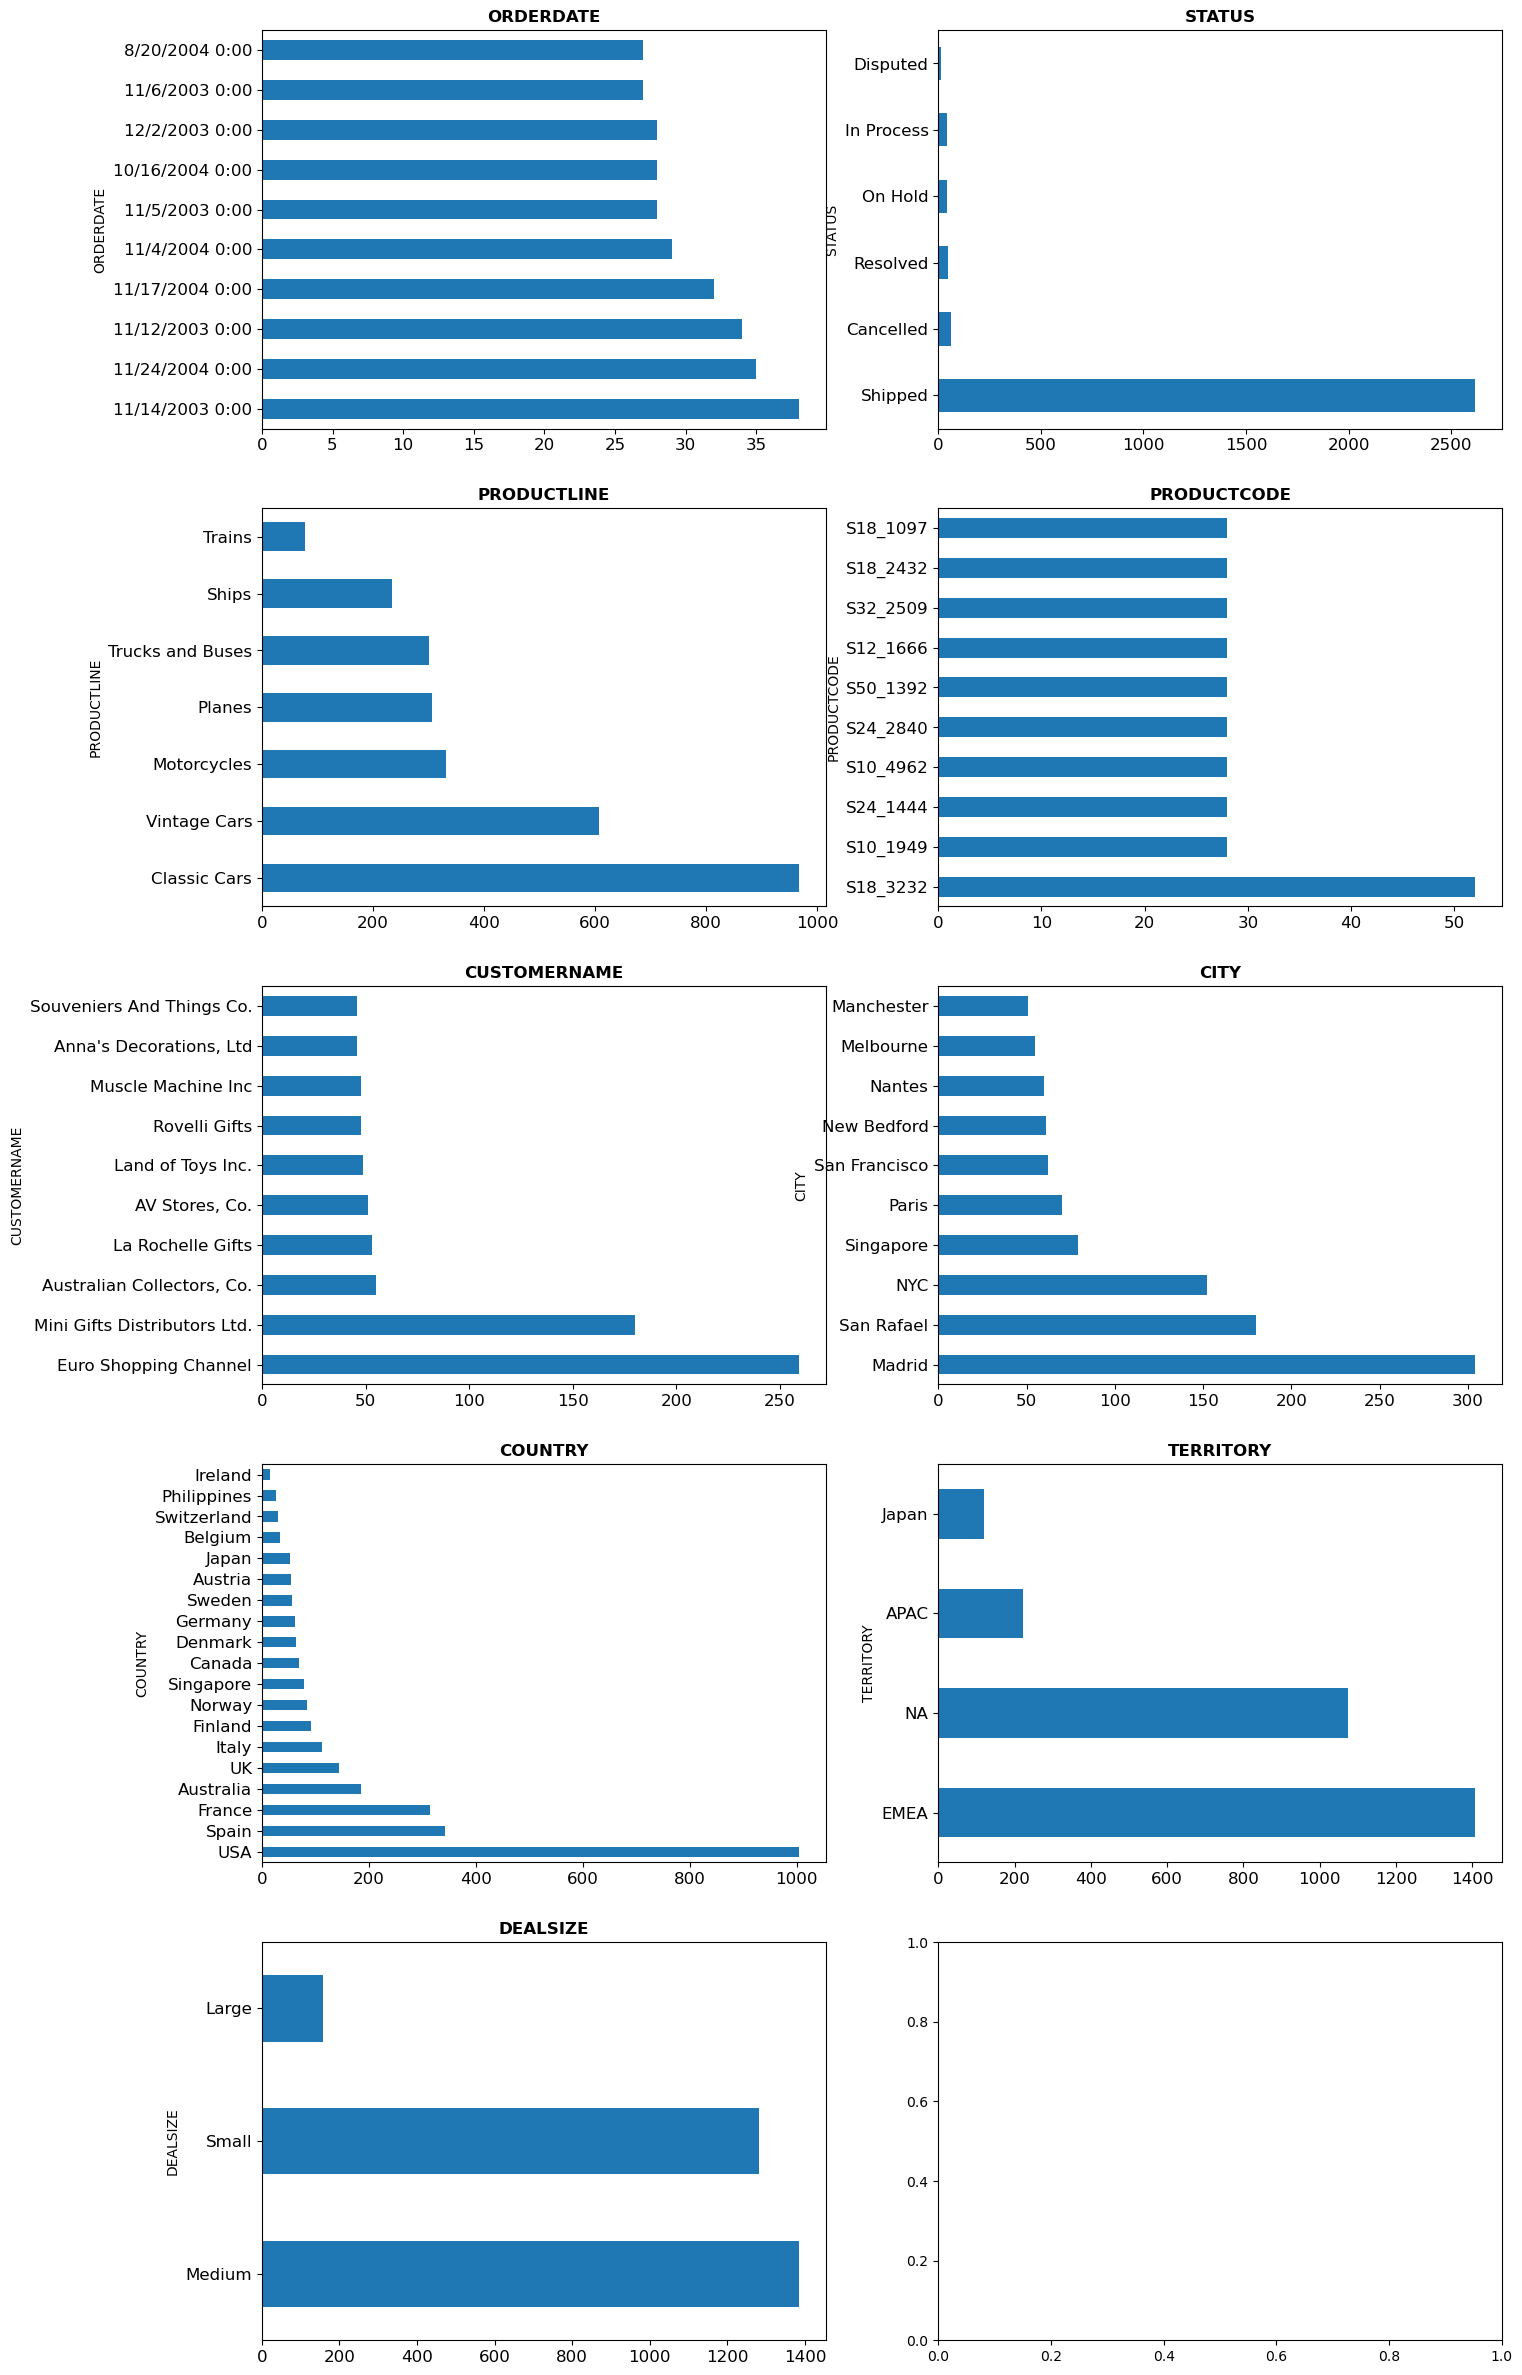

In [12]:
Graph_EDA_Cat(df.select_dtypes('O'))

In [13]:
df.drop(columns = ['PRODUCTCODE'], inplace = True)

In [14]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,96,2871,2/24/2003 0:00,Shipped,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,NA,Small
1,10121,34,81,2766,5/7/2003 0:00,Shipped,5,2003,Motorcycles,95,Reims Collectables,Reims,France,EMEA,Small
2,10134,41,95,3884,7/1/2003 0:00,Shipped,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,EMEA,Medium
3,10145,45,83,3747,8/25/2003 0:00,Shipped,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,NA,Medium
4,10159,49,100,5205,10/10/2003 0:00,Shipped,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,NA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100,2244,12/2/2004 0:00,Shipped,12,2004,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Small
2819,10373,29,100,3979,1/31/2005 0:00,Shipped,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Oulu,Finland,EMEA,Medium
2820,10386,43,100,5418,3/1/2005 0:00,Resolved,3,2005,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Medium
2821,10397,34,62,2116,3/28/2005 0:00,Shipped,3,2005,Ships,54,Alpha Cognac,Toulouse,France,EMEA,Small


In [15]:
"""

Eliminamos PRODUCT CODE, ORDERDATE [Se observo que el producto mas vendido es: S18_3232 de classic Cars y que
a mediados de noviembre se suelen pedir mas productos, posiblemente para vender durante el mes de diciembre(Temporada Navidad)]

"""


'\n\nEliminamos PRODUCT CODE, ORDERDATE [Se observo que el producto mas vendido es: S18_3232 de classic Cars y que\na mediados de noviembre se suelen pedir mas productos, posiblemente para vender durante el mes de diciembre(Temporada Navidad)]\n\n'

In [16]:
Stadistic_Cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,10262.0,92.085478,10100.0,10180.0,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.092809,35.0,9.741443,6.0,27.0,35.0,43.0,97.0
PRICEEACH,2823.0,83.660999,96.0,20.175195,27.0,69.0,96.0,100.0,100.0
SALES,2823.0,3553.907545,3185.0,1841.876815,482.0,2203.5,3185.0,4508.0,14083.0
MONTH_ID,2823.0,7.092455,8.0,3.656633,1.0,4.0,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,2004.0,0.699670,2003.0,2003.0,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,99.0,40.187912,33.0,68.0,99.0,124.0,214.0


In [17]:
##ELIMINAMOS ORDERNUMBER ya que no nos interesa para el analisis:

In [18]:
df.drop(columns = ['ORDERNUMBER'], inplace = True)

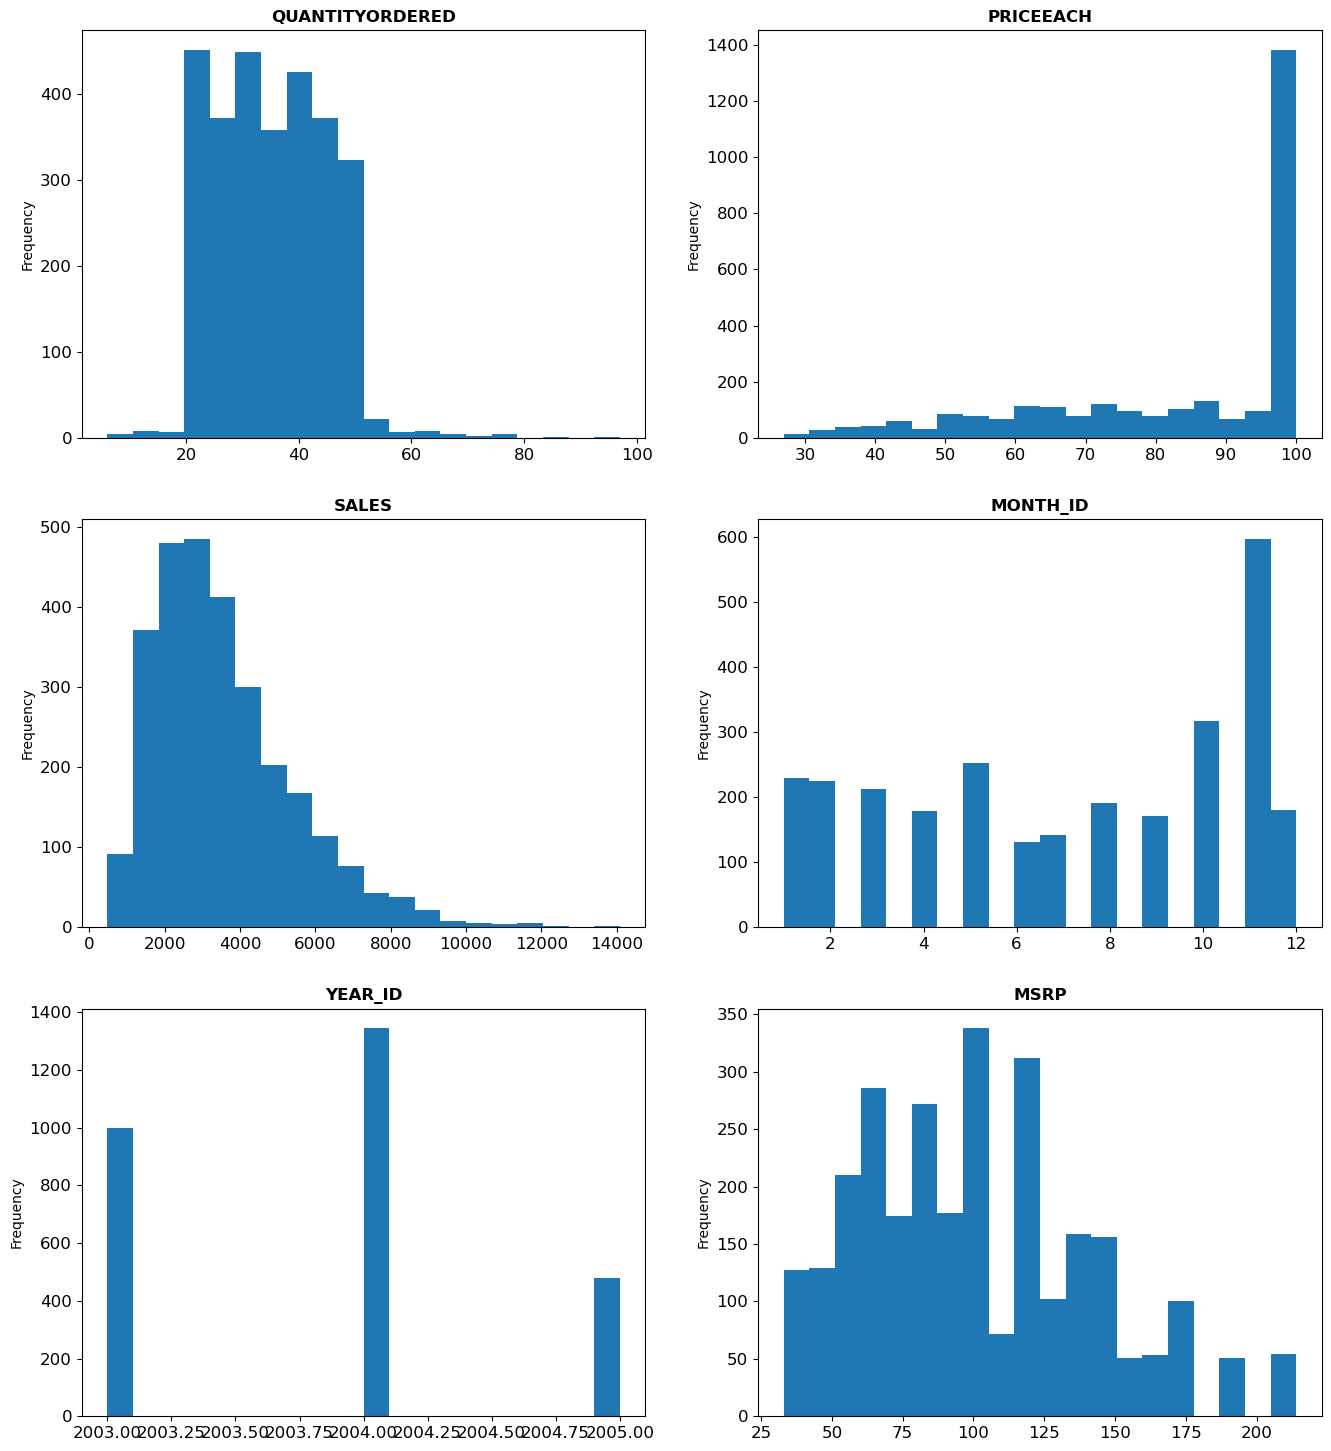

In [19]:
Graph_EDA_Num(df.select_dtypes('number'))

In [20]:
### GENERACION DE INSIGHTS:

"""
+ ¿Cual es el precio estimado del envio segun el peso de nuestros paquetes y el territorio (EMEA,NA,APAC,JAPAN) a donde van?

+ ¿Cual es el porcentaje de ganancia o perdida de la empresa minorista segun nuestro MSRP? ¿Influye esto en las ventas de nuestros productos?

"""

'\n+ ¿Cual es el precio estimado del envio segun el peso de nuestros paquetes y el territorio (EMEA,NA,APAC,JAPAN) a donde van?\n\n+ ¿Cual es el porcentaje de ganancia o perdida de la empresa minorista segun nuestro MSRP? ¿Influye esto en las ventas de nuestros productos?\n\n'

In [21]:
# Calculamos el porcentaje de ganancia o pérdida
df['STIMATED_EARNS_TO_CLIENT'] = (df['PRICEEACH'] - df['MSRP']) / df['MSRP']
#PROMEDIO DE GANANCIAS O PERDIDAS CLIENTES
df['STIMATED_EARNS_TO_CLIENT'].mean()

-0.09510793189860194

In [22]:
###¿Cual es el precio estimado del envio segun nuestros datos?

In [23]:
# Definimos las tarifas de envío para cada territorio y categoría segun nuestro operador:
tarifas = {
    ('NA', 'Small'): 187.4,
    ('NA', 'Medium'): 843.3,
    ('NA', 'Large'): 1789.67,
    ('APAC', 'Small'): 248.5,
    ('APAC', 'Medium'): 1118.25,
    ('APAC', 'Large'): 2373.175,
    ('EMEA', 'Small'): 215,
    ('EMEA', 'Medium'): 967.5,
    ('EMEA', 'Large'): 2053.25,
    ('JAPAN', 'Small'): 261.2,
    ('JAPAN', 'Medium'): 1175.4,
    ('JAPAN', 'Large'): 2494.46
}

# Calculamos el costo estimado de envío
df['Stimated_Ship_Cost'] = df.apply(lambda row: tarifas.get((row['TERRITORY'], row['DEALSIZE'])), axis=1)

df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE,STIMATED_EARNS_TO_CLIENT,Stimated_Ship_Cost
0,30,96,2871,2/24/2003 0:00,Shipped,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,NA,Small,0.010526,187.4
1,34,81,2766,5/7/2003 0:00,Shipped,5,2003,Motorcycles,95,Reims Collectables,Reims,France,EMEA,Small,-0.147368,215.0
2,41,95,3884,7/1/2003 0:00,Shipped,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,EMEA,Medium,0.000000,967.5
3,45,83,3747,8/25/2003 0:00,Shipped,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,NA,Medium,-0.126316,843.3
4,49,100,5205,10/10/2003 0:00,Shipped,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,NA,Medium,0.052632,843.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100,2244,12/2/2004 0:00,Shipped,12,2004,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Small,0.851852,215.0
2819,29,100,3979,1/31/2005 0:00,Shipped,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Oulu,Finland,EMEA,Medium,0.851852,967.5
2820,43,100,5418,3/1/2005 0:00,Resolved,3,2005,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Medium,0.851852,967.5
2821,34,62,2116,3/28/2005 0:00,Shipped,3,2005,Ships,54,Alpha Cognac,Toulouse,France,EMEA,Small,0.148148,215.0


In [24]:
###¿Cual es el promedio del precio de envio:
df['Stimated_Ship_Cost'].mean()

658.4262583271651

In [25]:
"""
¿Cual es el promedio de ganancias de nuestra empresa hasta ahora?
"""

'\n¿Cual es el promedio de ganancias de nuestra empresa hasta ahora?\n'

In [26]:
df['BRUTE_SALES'] = (df['SALES'] - df['Stimated_Ship_Cost'])

In [27]:
df['BRUTE_SALES'].mean()
df['Stimated_Ship_Cost'] = df['Stimated_Ship_Cost'].fillna(658.42)
df['BRUTE_SALES'] = df['BRUTE_SALES'].fillna(2886.17)

In [28]:

###¿Cual es el impacto economico de los gastos de envio?
df['Stimated_Ship_Cost'].sum()

1858736.5699999998

In [29]:
df['SALES'].sum()

10032681

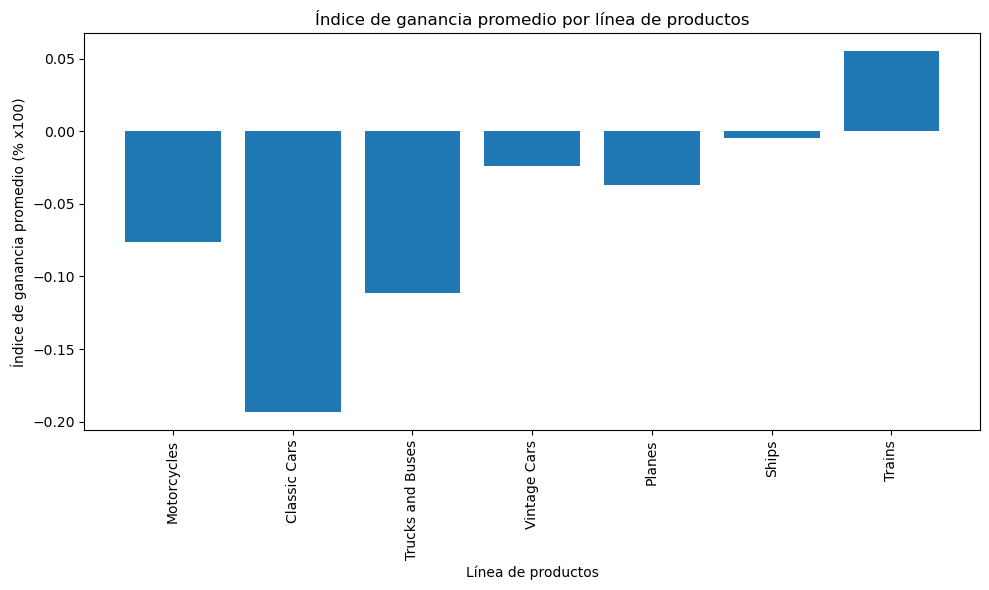

In [30]:
# Calcular el índice de ganancia promedio por línea de productos
lineas_productos = df['PRODUCTLINE'].unique()
ganancias_promedio = []
for linea in lineas_productos:
    ganancias_promedio.append(df[df['PRODUCTLINE'] == linea]['STIMATED_EARNS_TO_CLIENT'].mean())

# Graficamos el índice de ganancia por línea de productos (Segun MSRP)
plt.figure(figsize=(10, 6))
plt.bar(lineas_productos, ganancias_promedio)
plt.xlabel('Línea de productos')
plt.ylabel('Índice de ganancia promedio (% x100)')
plt.title('Índice de ganancia promedio por línea de productos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
"""RECOMENDAMOS ajustar el MSRP de algunos clientes y/o productos para que esto no suponga perdidas para ellos o bien 'desalentar' a
futuros clientes.
"""

"RECOMENDAMOS ajustar el MSRP de algunos clientes y/o productos para que esto no suponga perdidas para ellos o bien 'desalentar' a\nfuturos clientes.\n"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


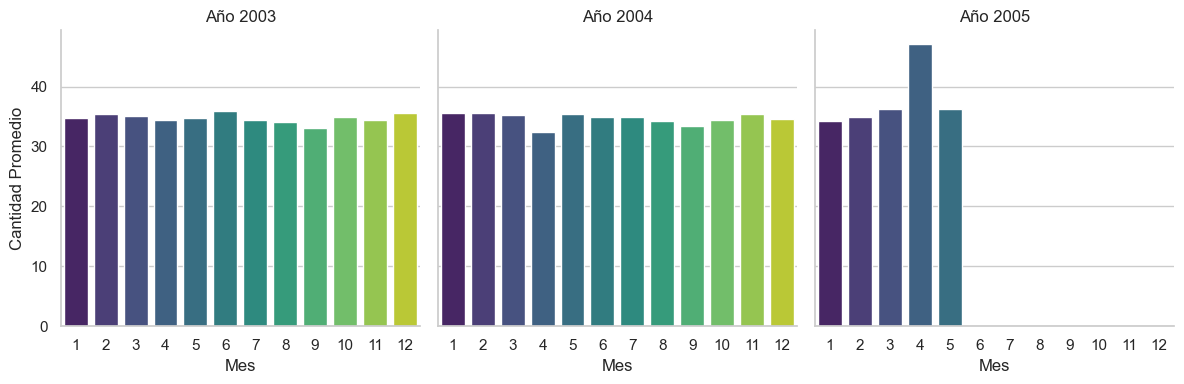

In [32]:
"""¿Cómo podemos prever la demanda de juguetes para los próximos meses?"""

# Calcular la cantidad promedio por mes y año
average_quantity_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].mean().reset_index()

# Asegurarnos de tener todos los meses en el eje x
months_order = list(range(1, 13))

# Visualizar gráficamente la cantidad promedio por AÑO
sns.set(style="whitegrid")
g = sns.catplot(x='MONTH_ID', y='QUANTITYORDERED', col="YEAR_ID", col_wrap=3,
                data=average_quantity_by_month, kind='bar', height=4, palette='viridis',
                order=months_order)

g.set_axis_labels('Mes', 'Cantidad Promedio')
g.set_titles('Año {col_name}')
g.tight_layout()

plt.show()


In [33]:
# Calculamos la cantidad promedio por mes y año
average_quantity_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].mean().reset_index()

# Calculamos el conteo total de pedidos por mes y año
total_orders_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].count().reset_index()
total_orders_by_month = total_orders_by_month.rename(columns={'QUANTITYORDERED': 'TOTALORDERS'})

# Calculamos el promedio de pedidos: 
average_quantity_order = average_quantity_by_month['QUANTITYORDERED'].mean()

print(f"Promedio de Cantidad de Pedidos: {average_quantity_order}")


Promedio de Cantidad de Pedidos: 35.243547043728796


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


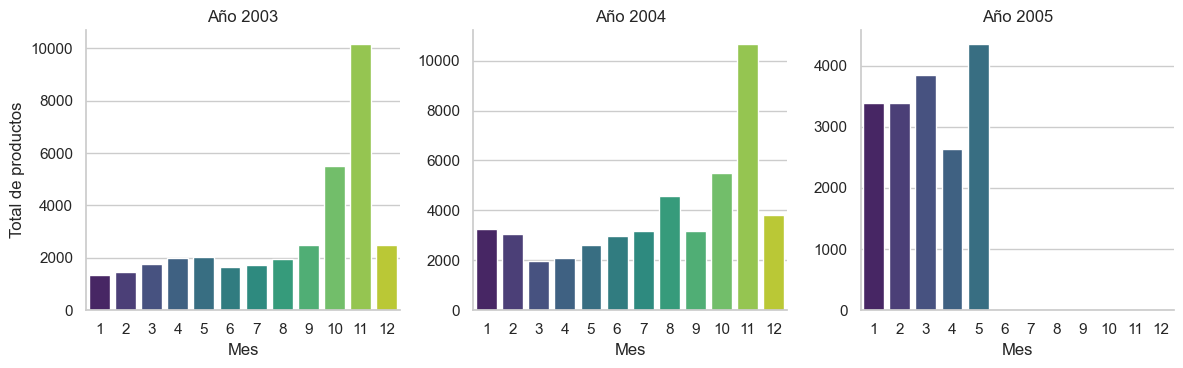

'CALCULAMOS EL TOTAL DE PRODUCTOS ENVIADOS EN LOS MESES DEL REGISTRO: '

In [34]:
# Calculamos el total de productos por mes y año
total_products_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].sum().reset_index()

# Especificamos el orden de los meses
order_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Visualizamos gráficamente la cantidad total de productos por mes y año
sns.set(style="whitegrid")
g = sns.FacetGrid(total_products_by_month, col="YEAR_ID", col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, 'MONTH_ID', 'QUANTITYORDERED', order=order_months, palette='viridis')

g.set_axis_labels('Mes', 'Total de productos')
g.set_titles('Año {col_name}')
g.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste de la disposición para evitar superposiciones
plt.show()
"""CALCULAMOS EL TOTAL DE PRODUCTOS ENVIADOS EN LOS MESES DEL REGISTRO: """

In [35]:
# Calcular el total de productos por mes y año
total_products_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].sum().reset_index()

# Renombraré la columna para evitar confusiones
total_products_by_month = total_products_by_month.rename(columns={'QUANTITYORDERED': 'TOTAL_PRODUCTS'})

# Fusionamos el DataFrame principal con el DataFrame calculado
df = pd.merge(df, total_products_by_month, on=['YEAR_ID', 'MONTH_ID'], how='left')

df


,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE,STIMATED_EARNS_TO_CLIENT,Stimated_Ship_Cost,BRUTE_SALES,TOTAL_PRODUCTS
0,30,96,2871,2/24/2003 0:00,Shipped,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,NA,Small,0.010526,187.4,2683.6,1449
1,34,81,2766,5/7/2003 0:00,Shipped,5,2003,Motorcycles,95,Reims Collectables,Reims,France,EMEA,Small,-0.147368,215.0,2551.0,2017
2,41,95,3884,7/1/2003 0:00,Shipped,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,EMEA,Medium,0.000000,967.5,2916.5,1725
3,45,83,3747,8/25/2003 0:00,Shipped,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,NA,Medium,-0.126316,843.3,2903.7,1974
4,49,100,5205,10/10/2003 0:00,Shipped,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,NA,Medium,0.052632,843.3,4361.7,5515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100,2244,12/2/2004 0:00,Shipped,12,2004,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Small,0.851852,215.0,2029.0,3804
2819,29,100,3979,1/31/2005 0:00,Shipped,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Oulu,Finland,EMEA,Medium,0.851852,967.5,3011.5,3395
2820,43,100,5418,3/1/2005 0:00,Resolved,3,2005,Ships,54,Euro Shopping Channel,Madrid,Spain,EMEA,Medium,0.851852,967.5,4450.5,3852
2821,34,62,2116,3/28/2005 0:00,Shipped,3,2005,Ships,54,Alpha Cognac,Toulouse,France,EMEA,Small,0.148148,215.0,1901.0,3852


In [36]:
# Eliminar la parte de la hora de la columna ORDERDATE
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce').dt.strftime('%Y-%m-%d')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
# Creamos nuevas columnas de fecha
df['Month'] = df['ORDERDATE'].dt.month
df['Day'] = df['ORDERDATE'].dt.day
df['DayOfWeek'] = df['ORDERDATE'].dt.dayofweek

In [37]:
###Modelado de Machine Learning
df.drop(columns = ['ORDERDATE'], inplace = True)
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   QUANTITYORDERED           2823 non-null   int64  
 1   PRICEEACH                 2823 non-null   int64  
 2   SALES                     2823 non-null   int64  
 3   STATUS                    2823 non-null   object 
 4   MONTH_ID                  2823 non-null   int64  
 5   YEAR_ID                   2823 non-null   int64  
 6   PRODUCTLINE               2823 non-null   object 
 7   MSRP                      2823 non-null   int64  
 8   CUSTOMERNAME              2823 non-null   object 
 9   CITY                      2823 non-null   object 
 10  COUNTRY                   2823 non-null   object 
 11  TERRITORY                 2823 non-null   object 
 12  DEALSIZE                  2823 non-null   object 
 13  STIMATED_EARNS_TO_CLIENT  2823 non-null   float64
 14  Stimated

In [38]:
### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

"""Transformamos todas las variables categóricas a númericas"""

'Transformamos todas las variables categóricas a númericas'

In [39]:
#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [40]:
cat_ohe

,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,...,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_Japan,TERRITORY_NA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2819,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2820,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2821,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
"""DF FINAL
-Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe"""

'DF FINAL\n-Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe'

In [42]:
# Seleccionamos las características numéricas
num = df.select_dtypes('number').reset_index(drop = True)
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,...,MONTH_ID,YEAR_ID,MSRP,STIMATED_EARNS_TO_CLIENT,Stimated_Ship_Cost,BRUTE_SALES,TOTAL_PRODUCTS,Month,Day,DayOfWeek
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,2003,95,0.010526,187.4,2683.6,1449,2,24,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,2003,95,-0.147368,215.0,2551.0,2017,5,7,2
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,7,2003,95,0.000000,967.5,2916.5,1725,7,1,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,8,2003,95,-0.126316,843.3,2903.7,1974,8,25,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,10,2003,95,0.052632,843.3,4361.7,5515,10,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,12,2004,54,0.851852,215.0,2029.0,3804,12,2,3
2819,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,2005,54,0.851852,967.5,3011.5,3395,1,31,0
2820,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,2005,54,0.851852,967.5,4450.5,3852,3,1,1
2821,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,2005,54,0.148148,215.0,1901.0,3852,3,28,0


In [43]:
# Separación de datos
X = df_ml.drop("QUANTITYORDERED", axis=1)
y = df_ml["QUANTITYORDERED"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Inicializamos el modelo de Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Entrenamos el modelo :|
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Comparamos las predicciones con los valores reales
comparison_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(comparison_df.head(10))

# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')  # Mejor mientras más se acerca a cero
print(f'R-squared (R^2): {r2}')  # Mejor si más se acerca a 1


      Real  Predicción
296     47       45.96
1485    30       29.97
70      39       39.59
124     47       48.10
1148    32       36.81
2750    40       40.12
224     38       43.57
2213    36       35.85
489     50       43.87
2309    20       20.93
Mean Squared Error (MSE): 12.546246635183
R-squared (R^2): 0.8723265432862112


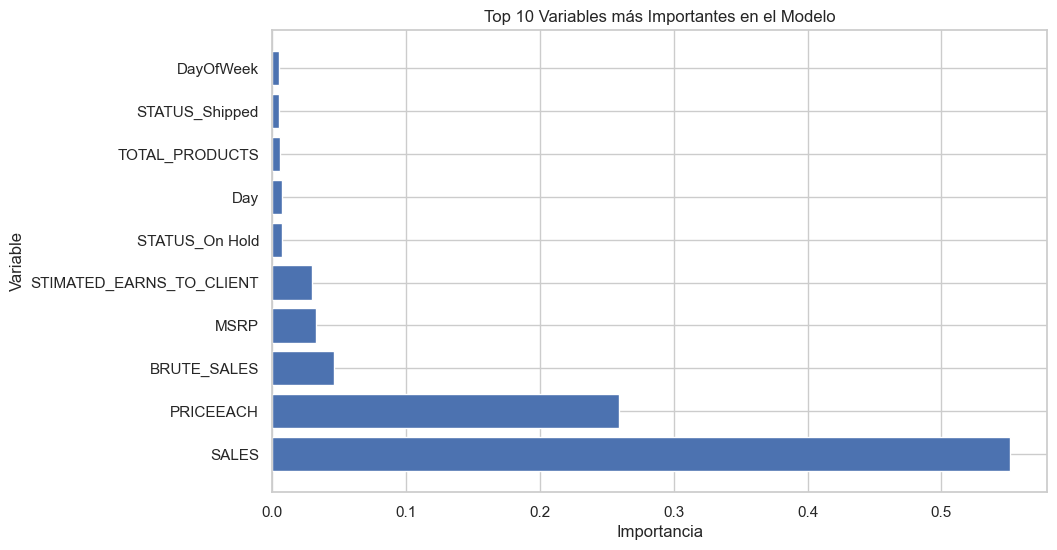

In [44]:
# Obtenemos la importancia de las variables desde el modelo
importances = rf_model.feature_importances_

# Creamos un DFrame con las variables y su importancia
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenamos el DF por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionamos las 10 variables con mayor importancia
top5_features = feature_importance_df.head(10)

# Graficamos var.
plt.figure(figsize=(10, 6))
plt.barh(top5_features['Feature'], top5_features['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Top 10 Variables más Importantes en el Modelo')
plt.show()

In [45]:
# Creamos una nueva columna en df para las predicciones
df['ESTIMATED_QUANTITY'] = np.nan  # Crear la columna con valores NaN

# Asignamos las predicciones a la columna correspondiente en base a los índices
df.loc[X_test.index, 'ESTIMATED_QUANTITY'] = y_pred

# Verificamos los primeros registros del DataFrame actualizado
print(df.head())# Crear una nueva columna en df para las predicciones
df['ESTIMATED_QUANTITY'] = np.nan  # Crear la columna con valores NaN

# Asignamos las predicciones a la columna correspondiente en base a los índices
df.loc[X_test.index, 'ESTIMATED_QUANTITY'] = y_pred

# Verificamos los primeros registros del DataFrame actualizado
print(df.head())

   QUANTITYORDERED  PRICEEACH  SALES   STATUS  MONTH_ID  YEAR_ID  PRODUCTLINE  \
0               30         96   2871  Shipped         2     2003  Motorcycles   
1               34         81   2766  Shipped         5     2003  Motorcycles   
2               41         95   3884  Shipped         7     2003  Motorcycles   
3               45         83   3747  Shipped         8     2003  Motorcycles   
4               49        100   5205  Shipped        10     2003  Motorcycles   

   MSRP              CUSTOMERNAME           CITY  ... TERRITORY DEALSIZE  \
0    95         Land of Toys Inc.            NYC  ...        NA    Small   
1    95        Reims Collectables          Reims  ...      EMEA    Small   
2    95           Lyon Souveniers          Paris  ...      EMEA   Medium   
3    95         Toys4GrownUps.com       Pasadena  ...        NA   Medium   
4    95  Corporate Gift Ideas Co.  San Francisco  ...        NA   Medium   

  STIMATED_EARNS_TO_CLIENT  Stimated_Ship_Cost  BRUTE_SA

In [46]:
df['ESTIMATED_QUANTITY'].fillna(df['ESTIMATED_QUANTITY'].mean(), inplace=True)

In [47]:
# Redondear la columna 'ESTIMATED_QUANTITY' al entero más cercano
df['ESTIMATED_QUANTITY'] = df['ESTIMATED_QUANTITY'].round().astype(int)

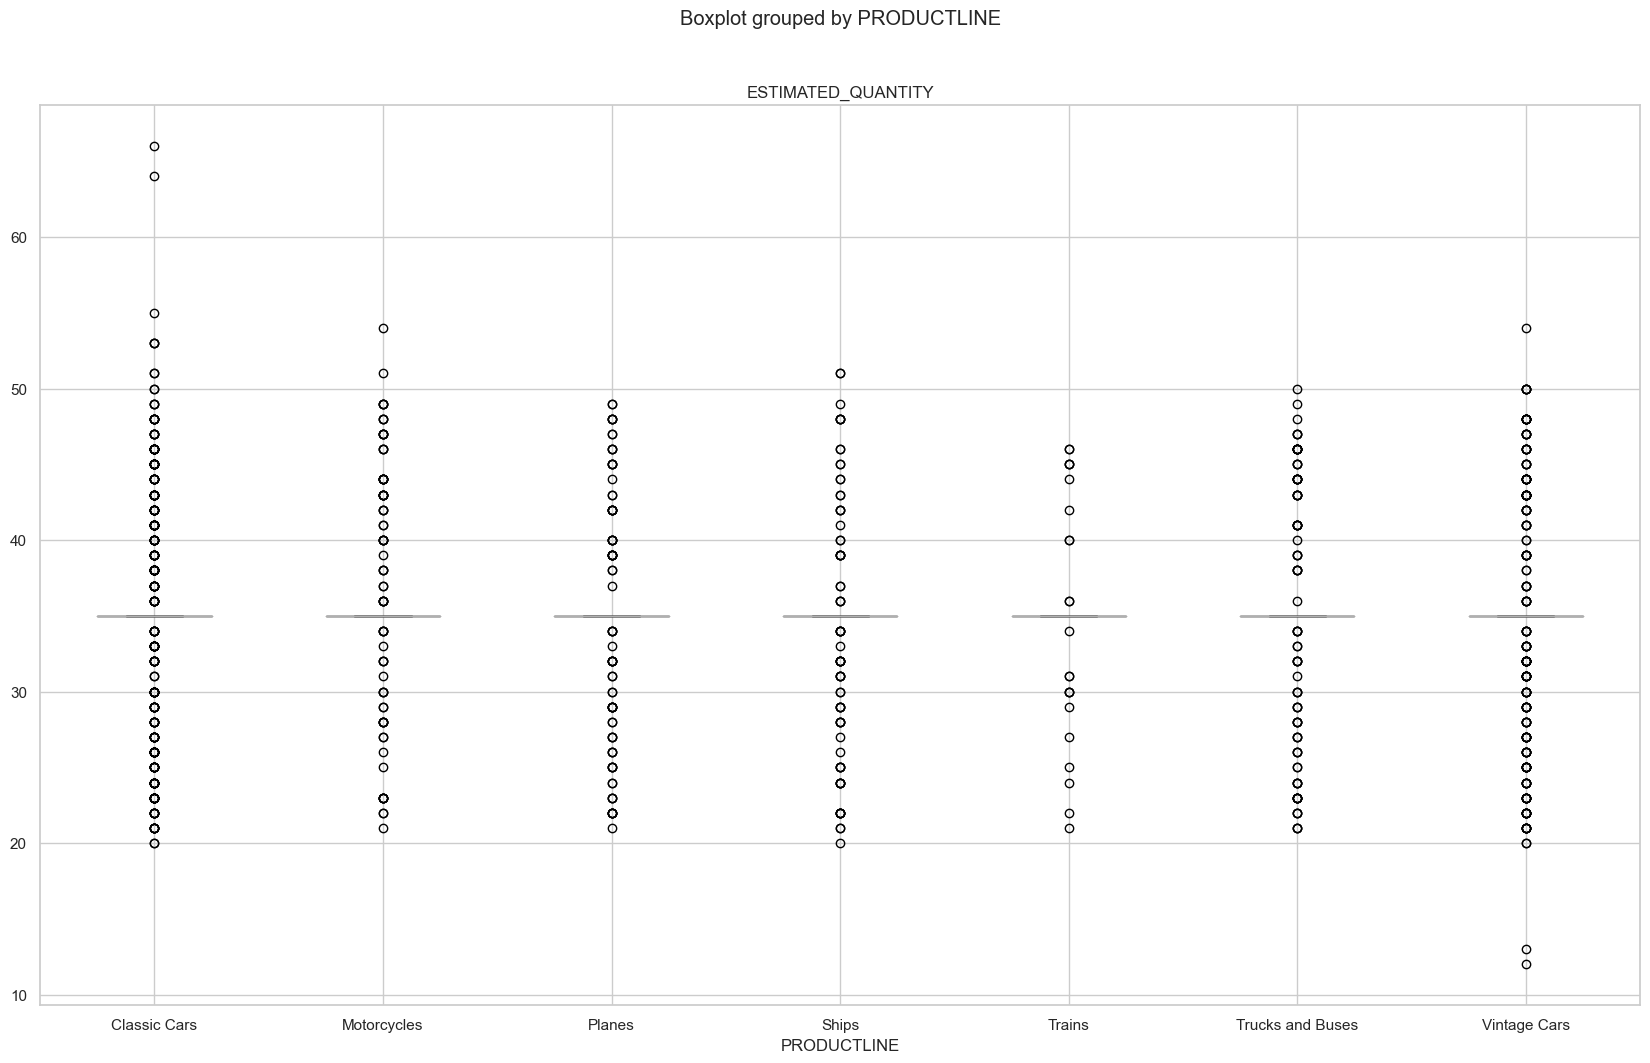

In [49]:
df.boxplot(column='ESTIMATED_QUANTITY', by='PRODUCTLINE', figsize = (20,12));


In [50]:
df.to_excel('SALES_SAMPLES_STIMATED.xlsx') 